In [7]:
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import mahotas as mh
# to float while loading
img=np.array(mh.imread('//home/amal//Datasets//Garden.jpeg'),dtype=np.float64)/255

In [ ]:
print(img.ndim)

In [6]:
width,height,depth=tuple(img.shape)
image_flatened=np.reshape(img,(width*height,depth))
print(image_flatened)
print(image_flatened.shape)

[[0.02745098 0.13333333 0.09803922]
 [0.0745098  0.18039216 0.14509804]
 [0.         0.09411765 0.05490196]
 ...
 [0.19607843 0.2        0.28235294]
 [0.19607843 0.2        0.28235294]
 [0.19607843 0.2        0.28235294]]
(50424, 3)


In [11]:
image_array_sample=shuffle(image_flatened,random_state=0)[:1000]
print(image_array_sample.shape)

(1000, 3)


In [12]:
estimator=KMeans(n_clusters=64,random_state=0)
estimator.fit(image_array_sample)

KMeans(n_clusters=64, random_state=0)

In [16]:
print(np.unique(estimator.labels_))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


In [23]:
# fr full data points 5000
cluster_assignemnts=estimator.predict(image_flatened)
print(cluster_assignemnts)
print(len(cluster_assignemnts))


[39 28  2 ... 14 14 14]
50424


In [25]:
compressed_palette=estimator.cluster_centers_

In [27]:
compressed_image=np.zeros((width,height,compressed_palette.shape[1]))

In [29]:
label_inx=0
for i in range(width):
    for j in range(height):
        compressed_image[i][j]=compressed_palette[cluster_assignemnts[label_inx]]
        label_inx+=1

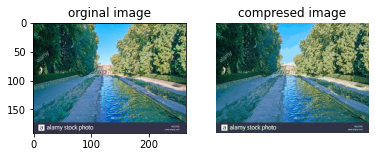

In [38]:
plt.subplot(1,2,1)
plt.title("orginal image")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("compresed image")
plt.imshow(compressed_image)
plt.axis("off")
plt.show()
plt.imsave('compressedimg.jpg',compressed_image)

In [39]:
import os
os.path.getsize('compressedimg.jpg')

16240

In [41]:
from io import BytesIO
img_file=BytesIO()
image_file_size=img_file.tell()
print(image_file_size)

0
